## David Gamaliel Arcos Bravo
### Programas Optimización y Metaheurísticas 1er Parcial

## Librerias

In [22]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

## Gráfica 2D

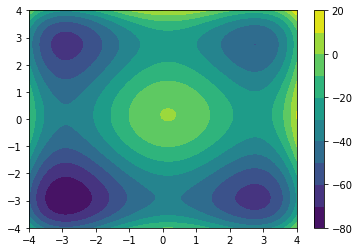

In [55]:
def grafica2D():
    n = 100
    X = np.linspace(-4,4,n)
    Y = np.linspace(-4,4,n)
    Z = np.zeros((n,n))
    for ix,x in enumerate(X):
        for iy,y in enumerate(Y):
            Z[ix,iy] = funcion((x,y))
    plt.contourf(X,Y,Z,10)
    plt.colorbar()
    plt.show()
    return
grafica2D()

## Funcion y Variables

In [70]:
f = lambda x : ((x[0]**4 - 16*x[0]**2 + 5*x[0]) + (x[1]**4 - 16*x[1]**2 + 5*x[1]))/2 

def funcion(variables):
    x1, x2 = variables
    return ((x1**4 - 16*x1**2 + 5*x1) + (x2**4 - 16*x2**2 + 5*x2))/2

x0 = (4,4)
K = 500

## Búsqueda Aleatoria Simple

In [51]:
def BusquedaAleatoriaSimple(K=100,dim=2,des=1.5):
    # Crear vector inicial de forma aleatoria
    v = np.array(dim)
    for _ in range(dim):
        v[_] = random(0,2)
    # Repetir K veces
    for _ in range(K):
        # Generar otro vector independiente aleatorio
        dk = np.copy(v)
        for _ in range(dim):
            dk[_] = random(0,2)
        # Sumar anterior con aleatorio
        nuevo = np.add(dk,v)
        if f(nuevo) < f(v):
            v = np.copy(nuevo)
    return v

## Búsqueda Aleatoria Localizada

In [50]:
def BusquedaAleatoriaLocalizada(K=100,dim=2,des=1.5):
    # Crear vector inicial de forma aleatoria
    v = np.array(dim)
    for _ in range(dim):
        v[_] = random()
    # Repetir K veces
    for _ in range(K):
        # Generar otro vector independiente aleatorio
        dk = np.copy(v)
        for _ in range(dim):
            dk[_] = np.random.normal(0,des)
        # Sumar anterior con aleatorio
        nuevo = np.add(dk,v)
        if f(nuevo) < f(v):
            v = np.copy(nuevo)
    return v

## Búsqueda de mínimos por intervalos

In [104]:
def BusquedaMinimosIntervalos(eps=1e-6,step=(1.0,1.0),a=(-4.0,-4.0),k=1.01):
    a = np.array(a,dtype=np.float32)
    step = np.array(step, dtype=np.float32)
    paro = False
    b = np.add(a,step)
    if f(b) > f(a):
        a, b, step = b, a, -step
    while not paro and abs(f(a)-f(b)) > eps:
        c = b = np.add(b,step)
        if f(c) > f(b) and a > c:
            a, c = c, a
            paro = True
        a, b, step = b, c, step*k
    print(b)
    return a,c